In [2]:
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from models import *

In [7]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_MNIST-model_CNN-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_1024-lr_1.0.pt', map_location ='cpu')

b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_MNIST-model_CNN-epoch_200-label_noise_prob_0.2-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_1024-lr_1.0.pt', map_location ='cpu')

c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_MNIST-model_CNN-epoch_200-label_noise_prob_0.5-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_1024-lr_1.0.pt', map_location ='cpu')



In [9]:
print('test accuracy:', a['test_acc_array'][-1], b['test_acc_array'][-1], c['test_acc_array'][-1], '\n')
print('train loss:', a['train_loss_array'][-1], b['train_loss_array'][-1], c['train_loss_array'][-1])

c['test_acc_array']

test accuracy: 98.77 98.78 98.79 

train loss: 5.59257747605443e-05 5.583575405180454e-05 5.5548732168972495e-05


array([95.9 , 97.94, 98.25, 98.5 , 98.56, 98.72, 98.74, 98.7 , 98.71,
       98.77, 98.79, 98.78, 98.78, 98.8 , 98.79, 98.78, 98.78, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79, 98.79,
       98.79, 98.79,

In [92]:
# # Loading the nets

# net1 = VGG('VGG19')
# net1.load_state_dict(a['net'], strict=False)
# net1.eval()

# net2 = VGG('VGG19')
# net2.load_state_dict(b['net'], strict=False)
# net2.eval()

In [10]:
# Loading the nets

net1 = CNN_mnist()
net1.load_state_dict(a['net'], strict=False)
net1.eval()

net2 = CNN_mnist()
net2.load_state_dict(b['net'], strict=False)
net2.eval()

net3 = CNN_mnist()
net3.load_state_dict(c['net'], strict=False)
net3.eval()

CNN_mnist(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

the min entry in the example 0 is tensor(-0.4242)
the max entry in the example 0 is tensor(2.8215)
the min entry in the example 1 is tensor(-0.4242)
the max entry in the example 1 is tensor(2.8215)
the min entry in the example 2 is tensor(-0.4242)
the max entry in the example 2 is tensor(2.8215)


torch.Size([1, 1, 28, 28])

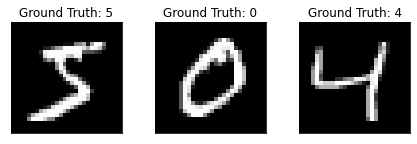

In [13]:
# loading the data

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
dataset1 = torchvision.datasets.MNIST('data', train=True, download=False,
                       transform=transform)
dataset2 = torchvision.datasets.MNIST('data', train=False,
                       transform=transform)
trainloader = torch.utils.data.DataLoader(dataset1, batch_size = 128)
testloader = torch.utils.data.DataLoader(dataset2, batch_size = 1000)

# plot 6 examples of data point
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()

In [14]:
Jac_1 = {}
Jac_2 = {}
Jac_3 = {}
# Jac_diff = {}

for i in range(20):
    Jac_1[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_2[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_3[i] = torch.autograd.functional.jacobian(net3, example_data[i:i+1,:,:,:], create_graph = True)
#     Jac_diff[i] = torch.autograd.functional.jacobian(net_diff, example_data[i:i+1,:,:,:], create_graph = True)

In [15]:
for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have (1/2)', (torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))), '\n')

for i in range(20):
    print('on the datapoint', i, 'we have (1/3)', (torch.norm((Jac_1[i])) / torch.norm((Jac_3[i]))), '\n')
    


on the datapoint 0 we have (1/2) tensor(0.9977, grad_fn=<DivBackward0>) 

on the datapoint 1 we have (1/2) tensor(0.9793, grad_fn=<DivBackward0>) 

on the datapoint 2 we have (1/2) tensor(1.0071, grad_fn=<DivBackward0>) 

on the datapoint 3 we have (1/2) tensor(1.0081, grad_fn=<DivBackward0>) 

on the datapoint 4 we have (1/2) tensor(0.9991, grad_fn=<DivBackward0>) 

on the datapoint 5 we have (1/2) tensor(1.0026, grad_fn=<DivBackward0>) 

on the datapoint 6 we have (1/2) tensor(0.9750, grad_fn=<DivBackward0>) 

on the datapoint 7 we have (1/2) tensor(0.9943, grad_fn=<DivBackward0>) 

on the datapoint 8 we have (1/2) tensor(1.0513, grad_fn=<DivBackward0>) 

on the datapoint 9 we have (1/2) tensor(0.9992, grad_fn=<DivBackward0>) 

on the datapoint 10 we have (1/2) tensor(1.0016, grad_fn=<DivBackward0>) 

on the datapoint 11 we have (1/2) tensor(1.0038, grad_fn=<DivBackward0>) 

on the datapoint 12 we have (1/2) tensor(1.0053, grad_fn=<DivBackward0>) 

on the datapoint 13 we have (1/2) t

In [16]:
for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'the difference of the two Jacobians is (1-2)/1', torch.norm(Jac_1[i]-Jac_2[i])/torch.norm(Jac_1[i]))
#     print('on the datapoint', i, 'the difference of the two neural nets is', torch.norm(net_diff(example_data[i:i+1,:,:,:]))/torch.norm(net1(example_data[i:i+1,:,:,:])))

for i in range(20):
    print('on the datapoint', i, 'the difference of the two Jacobians is (1-3)/1', torch.norm(Jac_1[i]-Jac_3[i])/torch.norm(Jac_1[i]))


on the datapoint 0 the difference of the two Jacobians is (1-2)/1 tensor(0.0968, grad_fn=<DivBackward0>)
on the datapoint 1 the difference of the two Jacobians is (1-2)/1 tensor(0.0994, grad_fn=<DivBackward0>)
on the datapoint 2 the difference of the two Jacobians is (1-2)/1 tensor(0.0734, grad_fn=<DivBackward0>)
on the datapoint 3 the difference of the two Jacobians is (1-2)/1 tensor(0.0618, grad_fn=<DivBackward0>)
on the datapoint 4 the difference of the two Jacobians is (1-2)/1 tensor(0.0556, grad_fn=<DivBackward0>)
on the datapoint 5 the difference of the two Jacobians is (1-2)/1 tensor(0.0714, grad_fn=<DivBackward0>)
on the datapoint 6 the difference of the two Jacobians is (1-2)/1 tensor(0.0950, grad_fn=<DivBackward0>)
on the datapoint 7 the difference of the two Jacobians is (1-2)/1 tensor(0.0617, grad_fn=<DivBackward0>)
on the datapoint 8 the difference of the two Jacobians is (1-2)/1 tensor(0.1639, grad_fn=<DivBackward0>)
on the datapoint 9 the difference of the two Jacobians 

In [17]:
Jac_4 = {}
Jac_5 = {}
Jac_6 = {}

for i in range(20):
    Jac_4[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_5[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_6[i] = torch.autograd.functional.jacobian(net3, example_data[i:i+1,:,:,:], create_graph = True)

In [18]:

for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have (1/2)', (torch.norm((Jac_4[i])) / torch.norm((Jac_5[i]))), '\n')

for i in range(20):
    print('on the datapoint', i, 'we have (1/3)', (torch.norm((Jac_4[i])) / torch.norm((Jac_6[i]))), '\n')
    


on the datapoint 0 we have (1/2) tensor(0.9977, grad_fn=<DivBackward0>) 

on the datapoint 1 we have (1/2) tensor(0.9793, grad_fn=<DivBackward0>) 

on the datapoint 2 we have (1/2) tensor(1.0071, grad_fn=<DivBackward0>) 

on the datapoint 3 we have (1/2) tensor(1.0081, grad_fn=<DivBackward0>) 

on the datapoint 4 we have (1/2) tensor(0.9991, grad_fn=<DivBackward0>) 

on the datapoint 5 we have (1/2) tensor(1.0026, grad_fn=<DivBackward0>) 

on the datapoint 6 we have (1/2) tensor(0.9750, grad_fn=<DivBackward0>) 

on the datapoint 7 we have (1/2) tensor(0.9943, grad_fn=<DivBackward0>) 

on the datapoint 8 we have (1/2) tensor(1.0513, grad_fn=<DivBackward0>) 

on the datapoint 9 we have (1/2) tensor(0.9992, grad_fn=<DivBackward0>) 

on the datapoint 10 we have (1/2) tensor(1.0016, grad_fn=<DivBackward0>) 

on the datapoint 11 we have (1/2) tensor(1.0038, grad_fn=<DivBackward0>) 

on the datapoint 12 we have (1/2) tensor(1.0053, grad_fn=<DivBackward0>) 

on the datapoint 13 we have (1/2) t

# Plotting

In [ ]:
toplot = {
    'train - 0.2': {'color': 'C0'},
    'test - 0.2': { 'color': "C1"},
    'train - 0.5': {'color': 'C2'},
    'test - 0.5': { 'color': "C3"},
}
 
results = {}

for label, fields in toplot.items():
        if label == 'train - 0.2':
           # accuracy_adam = mean_ad
            results[label] = v_3
        if label == 'test - 0.2':
          #  accuracy_da = mean
            results[label] = v_1
        if label == 'train - 0.5':
           # accuracy_adam = mean_ad
            results[label] = v_4
        if label == 'test - 0.5':
          #  accuracy_da = mean
            results[label] = v_2
            
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'train - 0.2':
           # accuracy_adam = mean_ad
            accuracy[label] = ('Train loss '+ (b['train_loss_array'][-1].astype('str'))[:6])
        if label == 'test - 0.2':
          #  accuracy_da = mean
            accuracy[label] = ('Test accuracy '+str(b['best_acc']))
        if label == 'train - 0.5':
           # accuracy_adam = mean_ad
            accuracy[label] = ('Train loss '+(c['train_loss_array'][-1].astype('str'))[:6])
        if label == 'test - 0.5':
          #  accuracy_da = mean
            accuracy[label] = ('Test accuracy '+str(b['best_acc']))